<a href="https://colab.research.google.com/github/shruthivenky/LGMVIP-DataScience/blob/main/Task2_Gobal_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LetsGrowMore**
##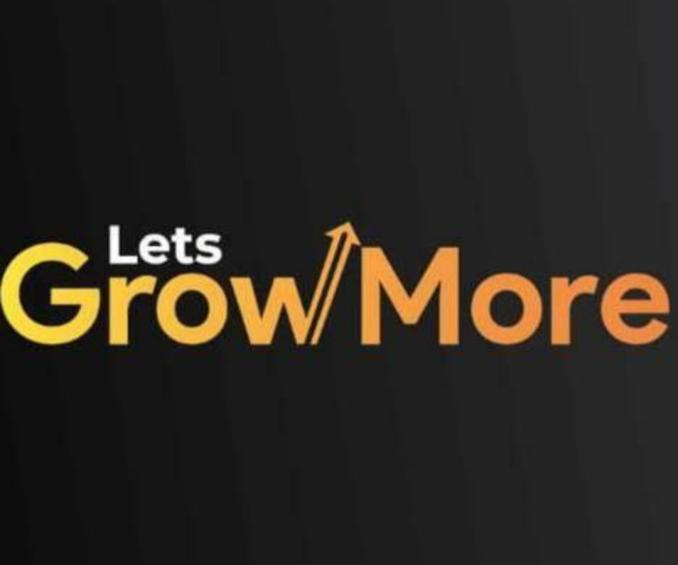

##Exploratory Data Analysis on Dataset - Terrorism 

##Import libraries

In [ ]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Load dataset and view few samples of the data

In [ ]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding="latin1")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##Observe the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
  print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  AttackType   181691 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Group        181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Weapon_type  181691 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
 18  addnotes     28289 non-n

In [ ]:
df.shape

(181691, 19)

##Checking for missing values

In [ ]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              434
latitude         4556
longitude        4557
location       126196
Summary         66129
AttackType          0
Target_type         0
Group               0
Motive         131130
Weapon_type         0
Killed          10313
Wounded         16311
addnotes       153402
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  AttackType   181691 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Group        181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Weapon_type  181691 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
 18  addnotes     28289 non-n

In [ ]:
df.describe(include="all")

,Year,Month,Day,Country,Region,state,city,latitude,longitude,location,Summary,AttackType,Target_type,Group,Motive,Weapon_type,Killed,Wounded,addnotes
count,181691.000000,181691.000000,181691.000000,181691,181691,181270,181257,177135.000000,1.771340e+05,55495,115562,181691,181691,181691,50561,181691,171378.000000,165380.000000,28289
unique,NaN,NaN,NaN,205,12,2855,36674,NaN,NaN,44109,112492,9,22,3537,14490,12,NaN,NaN,15429
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Baghdad,Unknown,NaN,NaN,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Bombing/Explosion,Private Citizens & Property,Unknown,Unknown,Explosives,NaN,NaN,Casualty numbers for this incident conflict ac...
freq,NaN,NaN,NaN,24636,50474,7645,9775,NaN,NaN,142,100,88255,43511,82782,14889,92426,NaN,NaN,1607
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403272,3.167668,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.545741,35.949392,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN


##Exploratory Data Analysis

In [ ]:
print('Country with most attacks: ',df['Country'].value_counts().idxmax())
print('City with most attacks: ',df['city'].value_counts().index[1])
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [ ]:
df['Year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [ ]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()


,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


##Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


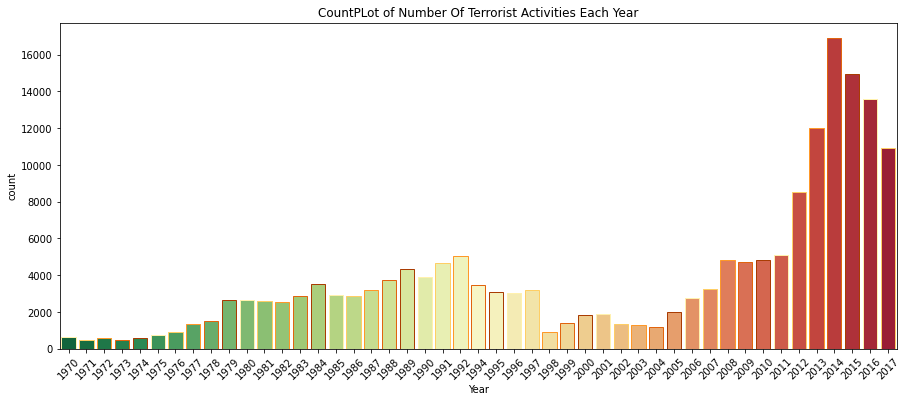

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=df, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('CountPLot of Number Of Terrorist Activities Each Year')
plt.show()

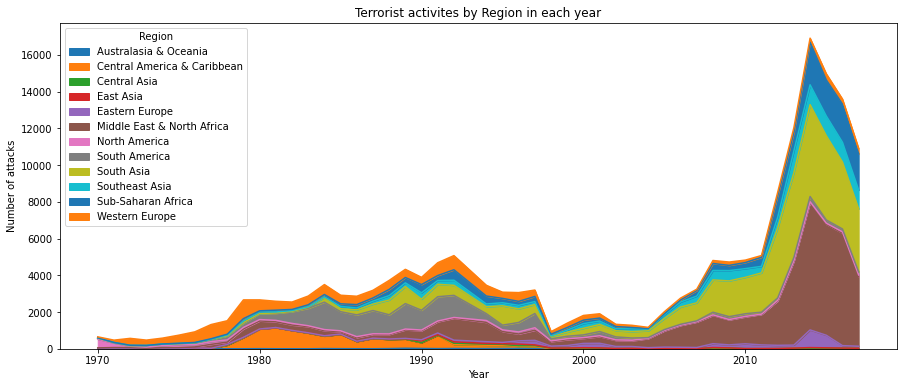

In [ ]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

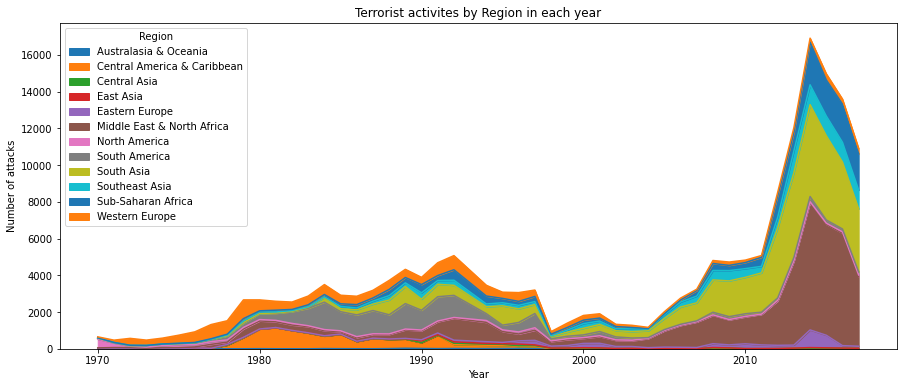

In [ ]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

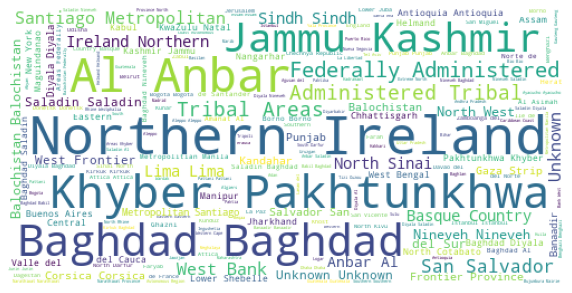

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities=df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [ ]:
terror_copy = df.sort_values(by='casualities',ascending=False)[:30]

In [ ]:
terror_copy.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
Year,1.000000,-0.032080,-0.169634,0.003728,0.150097,0.132656,-0.249850,-0.203149
Month,-0.032080,1.000000,-0.270759,0.314738,-0.398737,0.105265,0.101020,0.112755
Day,-0.169634,-0.270759,1.000000,-0.057494,0.198550,-0.171906,-0.032207,-0.062604
latitude,0.003728,0.314738,-0.057494,1.000000,-0.223085,-0.017608,0.131062,0.116579
longitude,0.150097,-0.398737,0.198550,-0.223085,1.000000,-0.196272,-0.258780,-0.274700
Killed,0.132656,0.105265,-0.171906,-0.017608,-0.196272,1.000000,0.354211,0.516918
Wounded,-0.249850,0.101020,-0.032207,0.131062,-0.258780,0.354211,1.000000,0.983632
casualities,-0.203149,0.112755,-0.062604,0.116579,-0.274700,0.516918,0.983632,1.000000


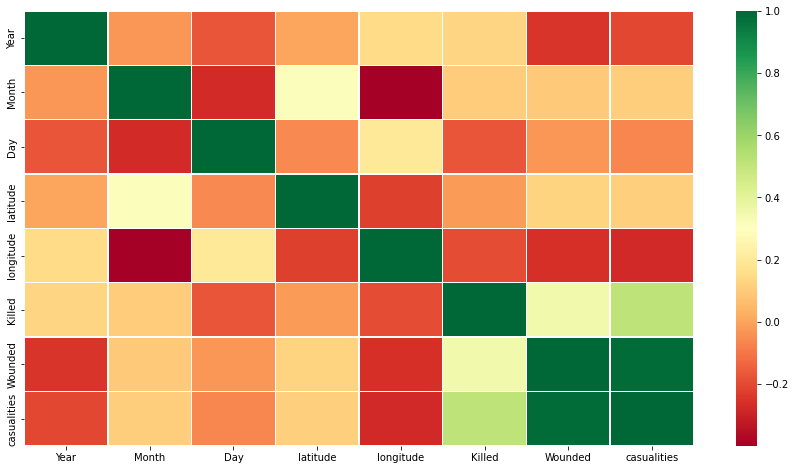

In [ ]:
plt.figure(figsize=[15,8])
sns.heatmap(terror_copy.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

In [ ]:
attack_country = df.Country.value_counts()[:15]
attack_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

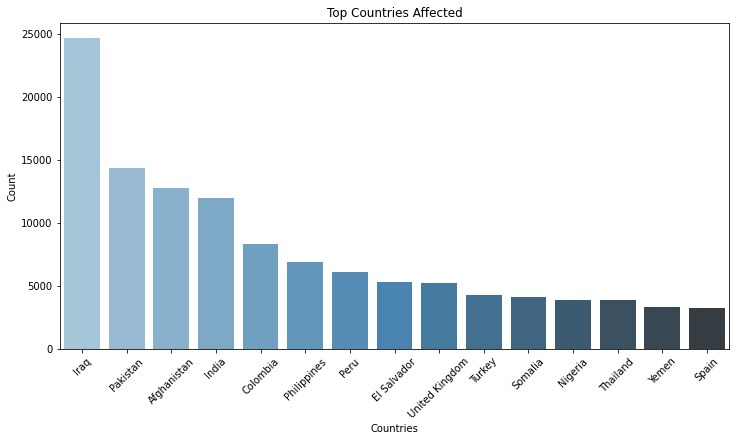

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)


In [ ]:
attack_groups = df.Group.value_counts()[1:15]
attack_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


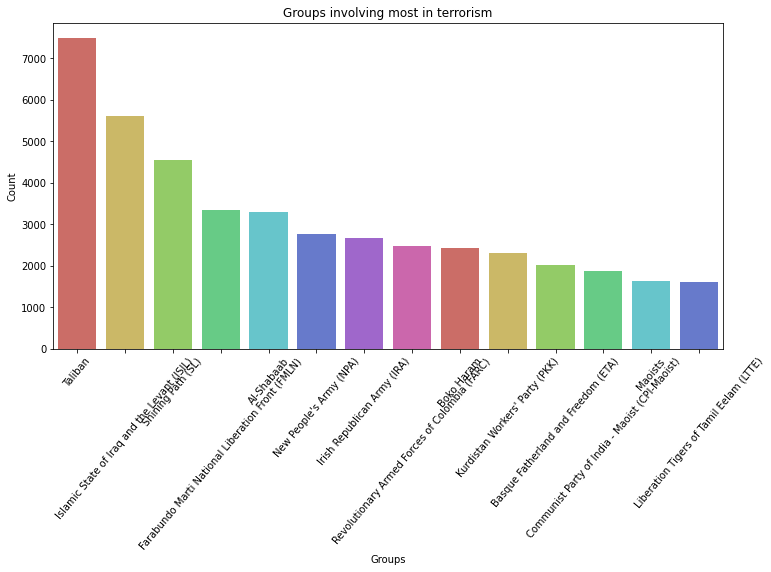

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_groups.index,attack_groups.values,palette=sns.color_palette("hls", 8))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 50)
plt.show()

In [ ]:
group_killed= df[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed

,Killed
Group,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


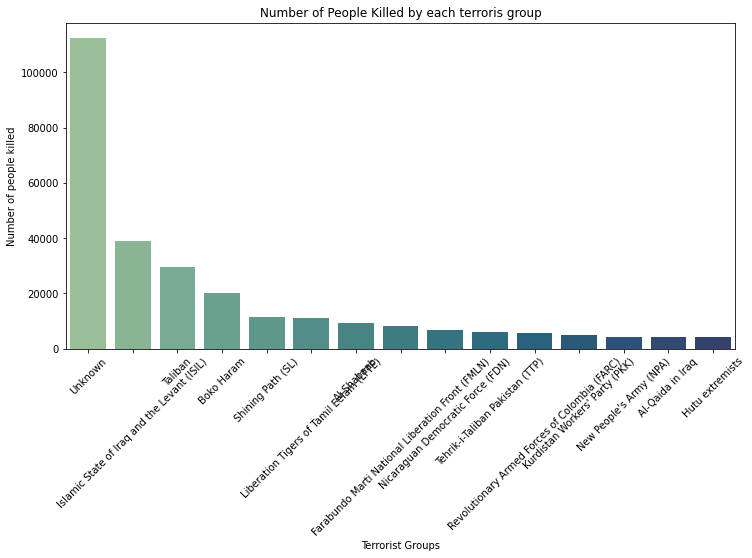

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.Killed.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


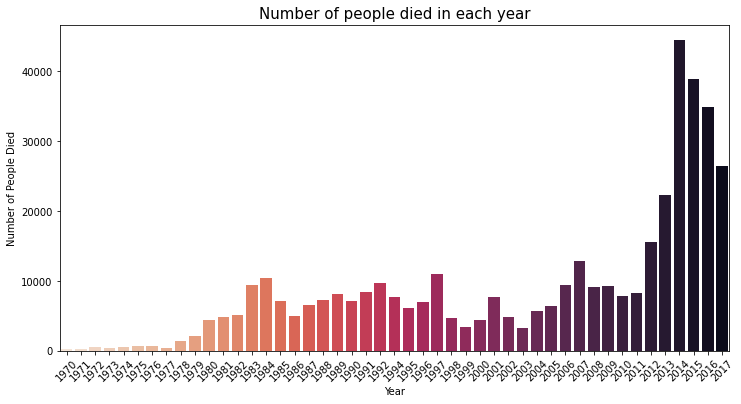

In [ ]:
died_people = df[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.Killed.values,palette="rocket_r")
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
attack_cities = df.city.value_counts()[:15]
attack_cities

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


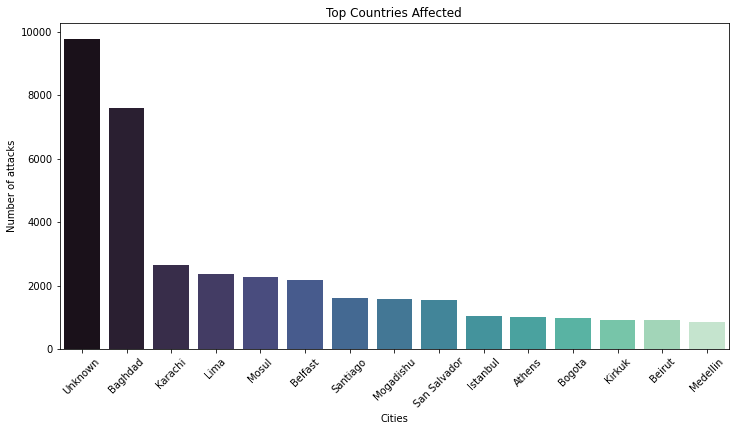

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_cities.index,attack_cities.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
attack_type = df.AttackType.value_counts()[:15]
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


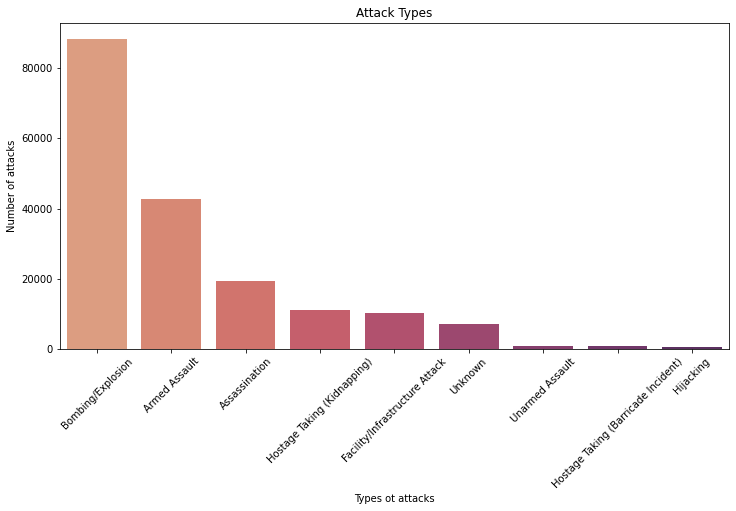

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_type.index,attack_type.values,palette="flare")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
attack_killed = df[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,Killed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


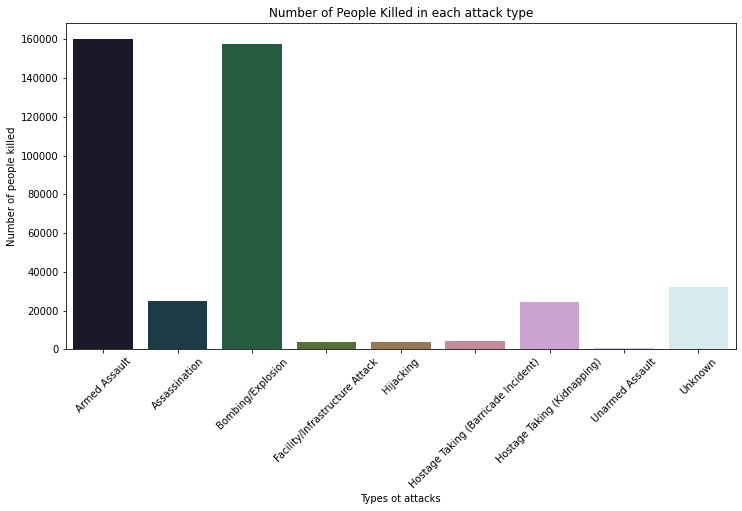

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_killed.index, attack_killed.Killed.values,palette="cubehelix")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()